In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium 
import random
from folium import plugins
from folium.plugins import HeatMap

Целью данного проекта является создание карты, демонстрирующей разделение города на районы по стоимости недвижимости.

## Оглавление     
1. [Загрузка данных](#1)    
2. [Подготовка данных](#2) 
3. [Построение карты](#3)    

## 1. Загрузка данных <a id='1'></a>

In [2]:
df=pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 2. Подготовка данных <a id='2'></a>

In [3]:
display(df.head())
print("Таблица содержит {:.0f} дубликатов".format(df.duplicated().sum()))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Таблица содержит 0 дубликатов


<AxesSubplot:>

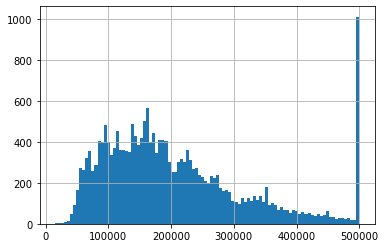

In [4]:
df.median_house_value.hist(bins=100)

На гистограмме можно видеть, что цена ограничена значением 500001, т.е. те объекты недвижимости, цена на которые имеет значение 500001 могут стоить больше.

<AxesSubplot:>

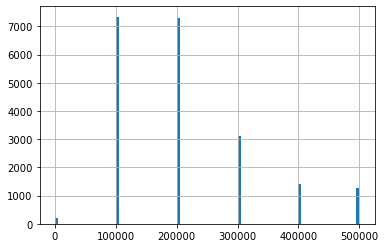

In [5]:
df['median_house_value_round']=round(df['median_house_value'], -5).astype('int')
df.median_house_value_round.hist(bins=100)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_house_value_round'],
      dtype='object')

In [7]:
df_fin=df[['longitude', 'latitude','median_house_value_round']]

In [8]:
print("Таблица содержит {:.0f} дубликатов".format(df_fin.duplicated().sum()))

Таблица содержит 6303 дубликатов


In [9]:
df_fin=df_fin.drop_duplicates()

## 3. Построение карты <a id='3'></a>

In [10]:
def generateBaseMap(default_location=[37.8, -122.2], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [16]:
map_h = folium.Map(location=[45.3288, -122.2], zoom_start = 1) 
map_h = generateBaseMap()
heat_data = [[row['latitude'],row['longitude']] for index, row in df_fin.iterrows()]
HeatMap(heat_data).add_to(map_h)
map_h

In [18]:
map_h.save('тепловая_карта.html')